In [1]:
import numpy as np
import math
def func_grad(x,y,w,k):
    k+=1
    m=len(x)
    n=len(x[0])
    x=np.array(x)
    del_J=[]
    for j in range(n):
        out=[]
        for i in range(m):
            mul=0
            sub=0
            dot=0
            dot=np.dot(w,np.array(x[i]))
            sub=dot-y[i]
            mul=(sub*x[i][j]/m) if abs(sub*x[i][j]/m)<1e308 else (sub*x[i][j]/m)*1e308/abs(sub*x[i][j]/m) # edited this to avoid overflow warning
            if mul:
                out.append(mul)
        out=sum(out)
        del_J.append(out)
    return del_J

def grad_desc(x,y,w,e,alpha):
    k=0
    for i in range(len(x)):
        x[i].insert(0,1)
    #print('hi')
    while(True):
        k+=1
        del_J=np.array(func_grad(x,y,w,k))
        #print(del_J)
        if np.linalg.norm(np.array(del_J))<e or k==1000: # added a new constraint
            return w
        else:
            w=np.subtract(w,alpha*del_J)

In [2]:
# qn2
import pandas as pd
df_1=pd.read_csv("C:\\Users\\Krishna\\Downloads\\univariate_linear_regression.csv")
a=df_1.iloc[:,0]
y=df_1.iloc[:,1]
a=a.to_numpy()
a=[[i] for i in a]
y=y.to_numpy()
w=np.array([1,1])

w_final=grad_desc(a,y,w,10**-5,0.01)
print(w_final)

[-10.06459922   2.97261313]


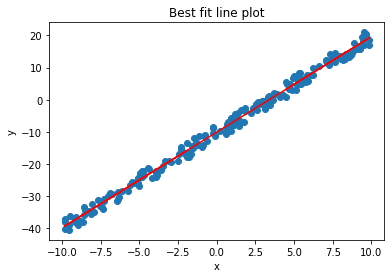

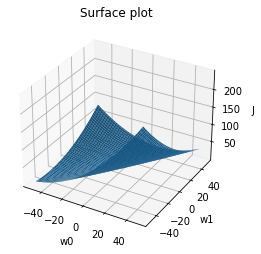

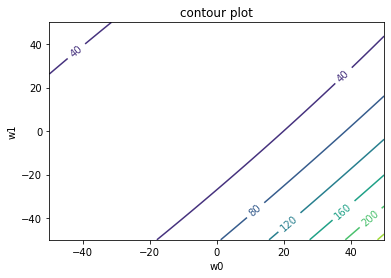

In [3]:
from matplotlib import pyplot as plt
def cost(X,y,w):
    sum1 = 0
    for i in range(len(X[0])):
        tmp = 0
        for j in range(len(X[i])):
            tmp += (w[1]*X[i][j] + w[0])
        sum1 += (tmp - y[i])**2
    return sum1/(2*len(X))
def surf_plot(w,X,y):
    x=np.linspace(-50,50,100)
    y=np.linspace(-50,50,100)
    w0,w1=np.meshgrid(x,y)
    #Jw =cost(X,y,w)
    Jw=[]
    for i in range(len(w0)):
        temp = []
        for j in range(len(w0[i])):
            temp.append(cost(X, y, [w0[i][j], w1[i][j]]))
        Jw.append(temp)
    Jw = np.array(Jw)
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    ax.set_title('Surface plot')
    ax.set_xlabel('w0')
    ax.set_ylabel('w1')
    ax.set_zlabel('J')
    ax.plot_surface(w0,w1,Jw)
    plt.show()
def cont_plot(w,X,y):
    x=np.linspace(-50,50,100)
    y=np.linspace(-50,50,100)
    w0,w1=np.meshgrid(x,y)
    Jw=[]
    for i in range(len(w0)):
        temp = []
        for j in range(len(w0[i])):
            temp.append(cost(X, y, [w0[i][j], w1[i][j]]))
        Jw.append(temp)
    Jw = np.array(Jw)
    fig=plt.figure()
    ax2=fig.add_subplot()
    cp=plt.contour(w0,w1,Jw)
    plt.clabel(cp)
    plt.title('contour plot')
    plt.xlabel('w0')
    plt.ylabel('w1')

X_scatter = df_1['x'].values.tolist()
y_scatter = df_1['y'].values.tolist()

X_line = np.array(X_scatter)
y_line = w_final[1]*X_line+w_final[0]

plt.plot(X_line, y_line, '-',color='red')
plt.scatter(X_scatter, y_scatter)
plt.title('Best fit line plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

surf_plot(w,a,y)
cont_plot(w,a,y)

In [4]:
import pandas as pd
import math
df_2=pd.read_csv("C:\\Users\\Krishna\\Downloads\\heart.data.csv")
y = list(df_2['heart.disease'])
x = df_2.iloc[:, [1, 2]]
x = x.values.tolist()
w=[1,1,1]
#print(x,y,sep='\n\n')
w_fin=grad_desc(x,y,w,0.0001,0.000005) # edited alpha and error values
print(w_fin)

[ 0.98677014 -0.05902773  0.62449106]


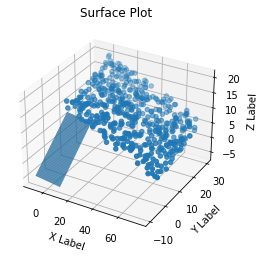

In [5]:
xx = np.linspace(-10, 10, 100)
yy = np.linspace(-10, 10, 100)

XX_scatter = df_2['biking'].values.tolist()
yy_scatter = df_2['smoking'].values.tolist()
ZZ_scatter = df_2['heart.disease'].values.tolist()

XX, YY = np.meshgrid(xx, yy)
Z = w_fin[1]*XX + w_fin[2]*YY + w_fin[0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, Z)
ax.scatter3D(XX_scatter,yy_scatter,ZZ_scatter)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('Surface Plot')
plt.show()